<a href="https://colab.research.google.com/github/valeromora/TAM_2025-1/blob/main/corte1/TAM_taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

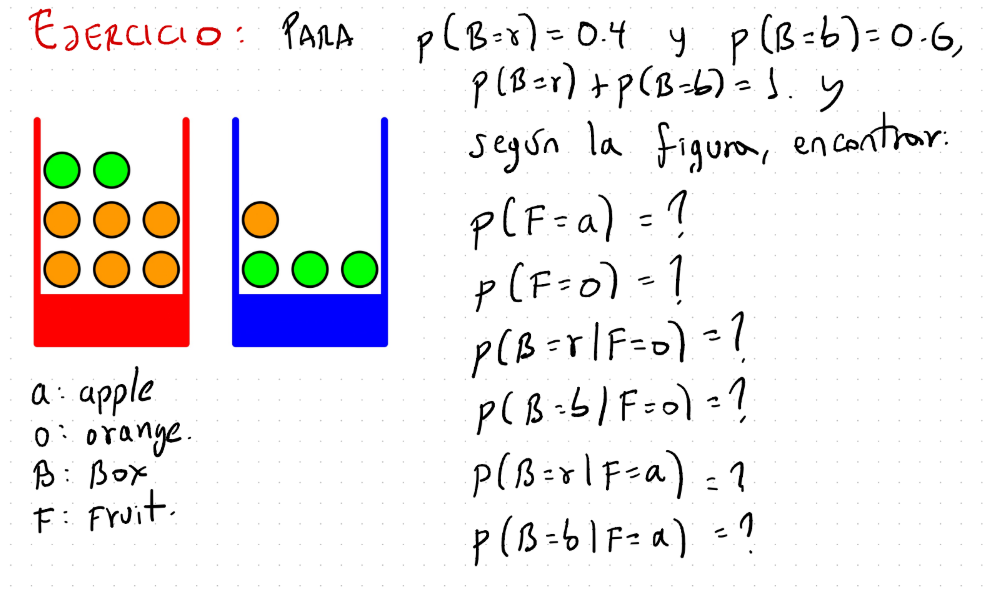

Prompt: En mi clase de teoria de aprendizaje de maquina estoy estudiando teorema de bayes y tengo un ejercicio particular en el que estoy trbajando, se tienen dos variables aleatoreas, caja y fruta, cada una tiene dos eventos, la caja puede ser roja o azul, y la fruta puede ser una manzana verde o una naranja. La probabilidad de que la caja sea roja es de 4/10 y la probabilidad de que sea azul es de 6/10, estos son los valores de prior. En la caja roja hay 8 frutas, 6 naranjas y 2 manzanas verdes, y en la caja azul hay 4 frutas, 1 naranja y 3 manzanas verdes.
Quiero hagas un codigo en pyhton para calcular:
1. valores de verosimilitud
2. valores de evidencia
3. probabilidad conjunta mediante el teorema de Bayes.

Todos los datos que te pedí imprimelos en fracciones.

In [2]:
from fractions import Fraction

# Datos del problema
prior_roja = Fraction(4, 10)
prior_azul = Fraction(6, 10)

# Verosimilitudes
# P(Fruta | Caja)
verosimilitud_naranja_roja = Fraction(6, 8)  # Naranja dado Roja
verosimilitud_manzana_roja = Fraction(2, 8) # Manzana dado Roja
verosimilitud_naranja_azul = Fraction(1, 4)  # Naranja dado Azul
verosimilitud_manzana_azul = Fraction(3, 4) # Manzana dado Azul

# Evidencias
# P(Fruta)
evidencia_naranja = verosimilitud_naranja_roja * prior_roja + verosimilitud_naranja_azul * prior_azul
evidencia_manzana = verosimilitud_manzana_roja * prior_roja + verosimilitud_manzana_azul * prior_azul

# Probabilidad Conjunta (Teorema de Bayes)
# P(Caja | Fruta)
prob_conjunta_roja_naranja = (verosimilitud_naranja_roja * prior_roja) / evidencia_naranja # Roja dado Naranja
prob_conjunta_azul_naranja = (verosimilitud_naranja_azul * prior_azul) / evidencia_naranja # Azul dado Naranja
prob_conjunta_roja_manzana = (verosimilitud_manzana_roja * prior_roja) / evidencia_manzana # Roja dado Manzana
prob_conjunta_azul_manzana = (verosimilitud_manzana_azul * prior_azul) / evidencia_manzana # Azul dado Manzana


# Imprimir los resultados
print("Verosimilitudes:")
print(f"P(Naranja|Roja): {verosimilitud_naranja_roja}")
print(f"P(Manzana|Roja): {verosimilitud_manzana_roja}")
print(f"P(Naranja|Azul): {verosimilitud_naranja_azul}")
print(f"P(Manzana|Azul): {verosimilitud_manzana_azul}")

print("\nEvidencias:")
print(f"P(Naranja): {evidencia_naranja}")
print(f"P(Manzana): {evidencia_manzana}")

print("\nProbabilidad Conjunta (Teorema de Bayes):")
print(f"P(Roja|Naranja): {prob_conjunta_roja_naranja}")
print(f"P(Azul|Naranja): {prob_conjunta_azul_naranja}")
print(f"P(Roja|Manzana): {prob_conjunta_roja_manzana}")
print(f"P(Azul|Manzana): {prob_conjunta_azul_manzana}")

Verosimilitudes:
P(Naranja|Roja): 3/4
P(Manzana|Roja): 1/4
P(Naranja|Azul): 1/4
P(Manzana|Azul): 3/4

Evidencias:
P(Naranja): 9/20
P(Manzana): 11/20

Probabilidad Conjunta (Teorema de Bayes):
P(Roja|Naranja): 2/3
P(Azul|Naranja): 1/3
P(Roja|Manzana): 2/11
P(Azul|Manzana): 9/11


Prompt 2: Perfecto, ahora quiero que generalices el problema, que un usuario pueda ingresar en el programa la cantidad de cajas que quiera, y los valores de prior para cada una, la variedad de frutas que quiera y el número de unidades que contiene cada caja de cada variedad de fruta. Dado esto imprime los valores que te había pedido anteriormente.

In [3]:
# Obtener la cantidad de cajas del usuario
num_cajas = int(input("Ingrese la cantidad de cajas: "))
nombres_cajas = [f"Caja {i + 1}" for i in range(num_cajas)]

# Obtener los valores de prior del usuario
priors = {}
for nombre_caja in nombres_cajas:
    prior = Fraction(input(f"Ingrese el prior para la caja {nombre_caja} (en fracción, ej. 3/4): "))
    priors[nombre_caja] = prior

# Obtener la variedad de frutas del usuario
num_frutas = int(input("Ingrese la cantidad de frutas: "))
nombres_frutas = [f"Fruta {i + 1}" for i in range(num_frutas)]

# Obtener el número de unidades de cada fruta en cada caja
unidades_frutas = {}
for nombre_caja in nombres_cajas:
    unidades_frutas[nombre_caja] = {}
    for nombre_fruta in nombres_frutas:
        unidades = int(input(f"Ingrese la cantidad de {nombre_fruta} en la {nombre_caja}: "))
        unidades_frutas[nombre_caja][nombre_fruta] = unidades

# Calcular las verosimilitudes
verosimilitudes = {}
for nombre_caja in nombres_cajas:
    verosimilitudes[nombre_caja] = {}
    total_frutas_caja = sum(unidades_frutas[nombre_caja].values())
    for nombre_fruta in nombres_frutas:
        verosimilitud = Fraction(unidades_frutas[nombre_caja][nombre_fruta], total_frutas_caja)
        verosimilitudes[nombre_caja][nombre_fruta] = verosimilitud

# Calcular las evidencias
evidencias = {}
for nombre_fruta in nombres_frutas:
    evidencia = 0
    for nombre_caja in nombres_cajas:
        evidencia += verosimilitudes[nombre_caja][nombre_fruta] * priors[nombre_caja]
    evidencias[nombre_fruta] = evidencia

# Calcular las probabilidades conjuntas (Teorema de Bayes)
prob_conjuntas = {}
for nombre_caja in nombres_cajas:
    prob_conjuntas[nombre_caja] = {}
    for nombre_fruta in nombres_frutas:
        prob_conjunta = (verosimilitudes[nombre_caja][nombre_fruta] * priors[nombre_caja]) / evidencias[nombre_fruta]
        prob_conjuntas[nombre_caja][nombre_fruta] = prob_conjunta

# Imprimir los resultados
print("\nVerosimilitudes:")
for nombre_caja, verosimilitudes_caja in verosimilitudes.items():
    for nombre_fruta, verosimilitud in verosimilitudes_caja.items():
        print(f"P({nombre_fruta}|{nombre_caja}): {verosimilitud}")

print("\nEvidencias:")
for nombre_fruta, evidencia in evidencias.items():
    print(f"P({nombre_fruta}): {evidencia}")

print("\nProbabilidad Conjunta (Teorema de Bayes):")
for nombre_caja, prob_conjuntas_caja in prob_conjuntas.items():
    for nombre_fruta, prob_conjunta in prob_conjuntas_caja.items():
        print(f"P({nombre_caja}|{nombre_fruta}): {prob_conjunta}")

Ingrese la cantidad de cajas: 2
Ingrese el prior para la caja Caja 1 (en fracción, ej. 3/4): 4/10
Ingrese el prior para la caja Caja 2 (en fracción, ej. 3/4): 6/10
Ingrese la cantidad de frutas: 2
Ingrese la cantidad de Fruta 1 en la Caja 1: 2
Ingrese la cantidad de Fruta 2 en la Caja 1: 6
Ingrese la cantidad de Fruta 1 en la Caja 2: 3
Ingrese la cantidad de Fruta 2 en la Caja 2: 1

Verosimilitudes:
P(Fruta 1|Caja 1): 1/4
P(Fruta 2|Caja 1): 3/4
P(Fruta 1|Caja 2): 3/4
P(Fruta 2|Caja 2): 1/4

Evidencias:
P(Fruta 1): 11/20
P(Fruta 2): 9/20

Probabilidad Conjunta (Teorema de Bayes):
P(Caja 1|Fruta 1): 2/11
P(Caja 1|Fruta 2): 2/3
P(Caja 2|Fruta 1): 9/11
P(Caja 2|Fruta 2): 1/3
